# TASK - 4 SPAM SMS DETECTION USING MACHINE LEARNING ALGORITHM (Naive Bayes and SVM Classification) at CODSOFT Internship

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# WE WILL EXPLORE OUR DATASETS

In [2]:
df = pd.read_csv(r"C:\Users\H P\Desktop\Internship Task\spam.csv", encoding='ISO-8859-1')
df.columns = ['Category', 'Messages', 'v3', 'v4', 'v5']

In [3]:
# This was the Additional Column for the demo purpose so i Had removed this from origunal datasets

df.drop(['v3', 'v4', 'v5'], axis = 1, inplace = True)

In [4]:
df.head()

,Category,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.describe()

,Category,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Counting on how much Spam and Ham are included

df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [8]:
df.isnull().sum()

Category    0
Messages    0
dtype: int64

In [9]:
# Let's merge one column in this dataframe which will specify our ham and spam category

df['Category Count'] = df.Category.map({ 'ham' : 0, 'spam' : 1 })

In [10]:
df.head(10)

,Category,Messages,Category Count
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [11]:
# So now we have merge the count of category, we'll delete the first column

df.drop(['Category'], axis = 1, inplace = True)

In [12]:
df.head()

,Messages,Category Count
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


# PREPROCESSING OUR DATASET USING AI MODEL

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [14]:
# Clean and preprocess the text data by removing punctuation, stop words, and other noise.

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Removes non-word characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Removes single characters
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Replace the multiple spaces with single space
    text = text.lower() 
    text = text.split()
    
    
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return ' '.join(text)

In [15]:
df['Messages'] = df['Messages'].apply(preprocess_text)

# FEATURE EXTRACTION

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Messages'])
y = df['Category Count']

In [17]:
print(X)

  (0, 4656)	0.22331588422622858
  (0, 1735)	0.1897178948471492
  (0, 1072)	0.34152420933902794
  (0, 876)	0.38591407945809597
  (0, 2095)	0.34152420933902794
  (0, 4831)	0.2710064948546452
  (0, 1751)	0.22331588422622858
  (0, 878)	0.34152420933902794
  (0, 580)	0.30237659645385423
  (0, 1186)	0.31307495921542144
  (0, 2786)	0.2760402879244311
  (0, 1714)	0.16226774688701645
  (1, 2551)	0.5647537939557097
  (1, 4754)	0.4459451111953121
  (1, 2032)	0.47451057922863127
  (1, 2107)	0.4218684931830353
  (1, 2542)	0.2811632882742994
  (2, 41)	0.23671233334742495
  (2, 526)	0.16851314957353225
  (2, 3047)	0.16279867989786997
  (2, 4381)	0.12383502294019352
  (2, 3810)	0.19822868974819793
  (2, 3002)	0.16623021331440094
  (2, 3085)	0.16279867989786997
  (2, 351)	0.22253177271203253
  :	:
  (5567, 3047)	0.2599516331025906
  (5568, 1462)	0.6134635634925883
  (5568, 1621)	0.5293895218987117
  (5568, 4987)	0.3857537525829914
  (5568, 1854)	0.345422210787593
  (5568, 1714)	0.27438427256965814
  (5

In [18]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category Count, Length: 5572, dtype: int64


# SPLITTING THE DATASETS INTO TRAINING AND TESTING SETS

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print('Model has been Split up into Training and Testing sets')

Model has been Split up into Training and Testing sets


In [20]:
X_train.shape[0]

4457

In [21]:
X_test.shape[0]

1115

# LET'S TRAIN OUR TRAINING MODEL USING NAIVE BAYES ALGORITHM AND SEE WHICH MODEL SELECTION IS BEST

In [22]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, y_train)
print('The Model Has been trained successfuly')

The Model Has been trained successfuly


# LET'S PREDICT OUR MODEL WHETHER OUR MODEL IS PREDICTING CORRECT OR NOT

In [23]:
new_prediction = ["Oh k...i'm watching here:)"]
new_X = tfidf.transform(new_prediction)
predicted_category = naive.predict(new_X)

In [24]:
print(predicted_category)

[0]


The model has predicted correct as you can see 'HAM' - 0 & 'SPAM' - 1

# LET'S MERGE OUR ACTUAL TEST SET AND PREDICTED TEST SET RESULTS TOGETHER

In [25]:
y_pred_naive = naive.predict(X_test)

Results = pd.DataFrame({
    'Actual_Result' : y_test,
    'Predicted_Result' : y_pred_naive
})

In [26]:
Results.head(40)

,Actual_Result,Predicted_Result
4732,0,0
4952,0,0
3724,0,0
5261,0,0
1274,0,0
3390,0,0
888,0,0
5450,0,0
2478,0,0
4764,0,0


# FINDING THE ACCURACY SCORE, CONFUSION MATRIX AND CLASSIFICATION REPORT OF THE MODEL USED BY NAIVE BAYES

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm_naive = confusion_matrix(y_test, y_pred_naive)
print('Confusion Matrix of Naive Bayes Model is\n', cm_naive)
print()
ac_naive = accuracy_score(y_test, y_pred_naive)
print('The Accuracy Score Performed by the Model', ac_naive)

Confusion Matrix of Naive Bayes Model is
 [[967   0]
 [ 26 122]]

The Accuracy Score Performed by the Model 0.9766816143497757


As you can see over the confusion matrix, the False Positive recorded 0 value that means our Naive Bayes(MultinomialNB) have performed pretty well and Accuracy Score of 97%.

In [29]:
NB_clf_report = classification_report(y_test, y_pred_naive)
print(NB_clf_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       967
           1       1.00      0.82      0.90       148

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Except the Recall(SPAM - 1) almost the values are ranging between 90%.

# LET'S USE SUPPORT VECTOR MACHINE ALGORITHM AND SEE WHAT IS THE PREDICTION ACCURACY

In [30]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size = 0.2, random_state = 20)
print('Model has been Split up into Training and Testing sets')

Model has been Split up into Training and Testing sets


In [31]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_svm, y_train_svm)

SVC()

In [32]:
svm_prediction = ["Oh k...i'm watching here:)"]
svm_X = tfidf.transform(svm_prediction)
predicted_category_svm = naive.predict(svm_X)

In [33]:
print(predicted_category_svm)

[0]


In [34]:
y_pred_svm = svm.predict(X_test_svm)

Result_svm = pd.DataFrame({
    'Actual_SVM_Result' : y_test_svm,
    'Predicted_SVM_Result' : y_pred_svm
})

In [35]:
Result_svm.head(40)

,Actual_SVM_Result,Predicted_SVM_Result
4732,0,0
4952,0,0
3724,0,0
5261,0,0
1274,0,0
3390,0,0
888,0,0
5450,0,0
2478,0,0
4764,0,0


In [36]:
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
print('Confusion Matrix of Support Vector Machine Model is\n', cm_svm)
print()
ac_svm = accuracy_score(y_test_svm, y_pred_svm)
print('The Accuracy Score Performed by the Model', ac_svm)

Confusion Matrix of Support Vector Machine Model is
 [[965   2]
 [ 18 130]]

The Accuracy Score Performed by the Model 0.9820627802690582


Support Vector Machine has given 2 False Positive and 18 False Negative.

Accuracy Score of 98% higher than Naive Bayes Model.

In [37]:
svm_clf_report = classification_report(y_test_svm, y_pred_svm)

print(svm_clf_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       967
           1       0.98      0.88      0.93       148

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Look at the SVM Report almost all the results are close to 100%.

# PLOTTING THE DIFFERENCE OF CONFUSION MATRIX BETWEEN Naive Bayes and SVM

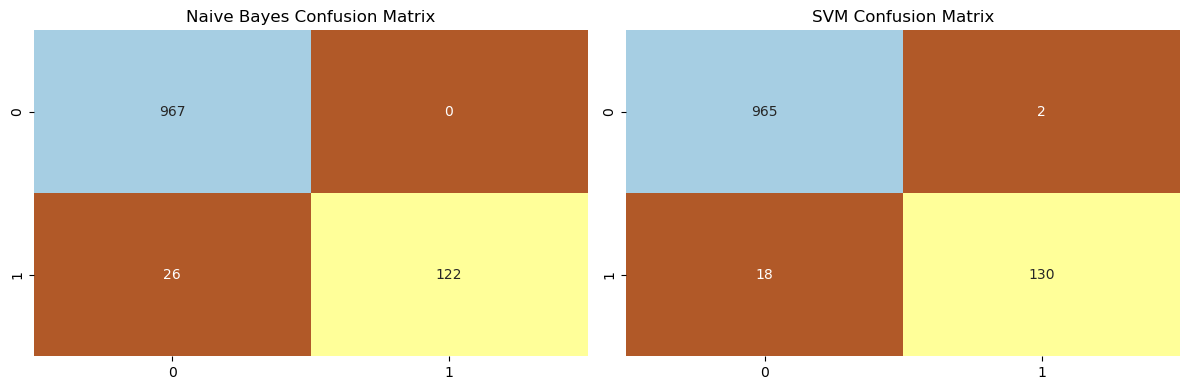

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# Naive Bayes Confusion Matrix
sns.heatmap(cm_naive, annot = True, fmt = 'd', cmap = 'Paired_r', cbar = False, ax = axes[0])
axes[0].set_title('Naive Bayes Confusion Matrix')

# SVM Confusion Matrix
sns.heatmap(cm_svm, annot = True, fmt = 'd', cmap = 'Paired_r', cbar = False, ax = axes[1])
axes[1].set_title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()

In both the Heatmaps, we can see the color diiference with different values

(1)In SkyBlue color : It is the True Positive(TP) of Naive Bayes and SVM, TP = 967 & 965.

(2)In Cream color : It is the True Negative(TN) of Naive Bayes and SVM, TN = 122 & 130.

(3)In Brown Color : It is the False Positive and Negative (FP & FN) of Naive Bayes and SVM, FP & FN = (0, 26) & (2, 18).

# PLOTTING THE ACCURACY SCORES OF NAIVE BAYES AND SVM MODEL

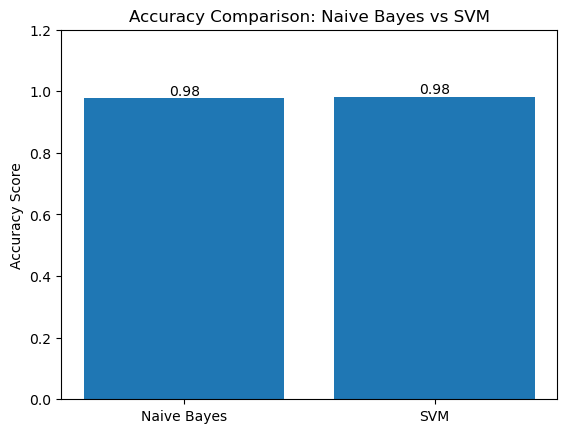

In [39]:
models = ['Naive Bayes', 'SVM']
accuracies = [ac_naive, ac_svm]

plt.bar(models, accuracies)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison: Naive Bayes vs SVM')
plt.ylim(0, 1.2)

# Annotate the bars with their respective scores
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.show()